# **【第5章】 データサイエンスの実践1：アイスクリーム売上分析**

## 02 どんなデータが必要だろう？


リスト5-1

In [ ]:
!pip install japanize-matplotlib
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["IPAexGothic"])

リスト5-2

In [ ]:
df = pd.read_csv('icecream_sales.csv')
df.head()

,日付,曜日,気温,年齢,性別,味,値段
0,2024-01-01,0,6.8,33.0,女性,ストロベリー,320
1,2024-01-02,1,8.3,29.0,女性,ストロベリー,320
2,2024-01-02,1,8.3,34.0,男性,抹茶,350
3,2024-01-03,2,7.4,17.0,女性,ストロベリー,320
4,2024-01-04,3,10.1,67.0,女性,バニラ,300


リスト5-3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付      3044 non-null   object 
 1   曜日      3044 non-null   int64  
 2   気温      3044 non-null   float64
 3   年齢      3014 non-null   float64
 4   性別      3044 non-null   object 
 5   味       3044 non-null   object 
 6   値段      3044 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 166.6+ KB


## 03 データからわかることは？



リスト5-4

In [ ]:
df.describe()

,曜日,気温,年齢,値段
count,3044.000000,3044.000000,3014.000000,3044.000000
mean,3.323587,25.538699,35.007299,346.688568
std,2.051127,8.314962,15.585294,87.106744
min,0.000000,3.200000,12.000000,0.000000
25%,2.000000,20.100000,22.000000,320.000000
50%,4.000000,27.100000,33.000000,350.000000
75%,5.000000,32.400000,47.000000,350.000000
max,6.000000,37.600000,67.000000,3500.000000


リスト5-5

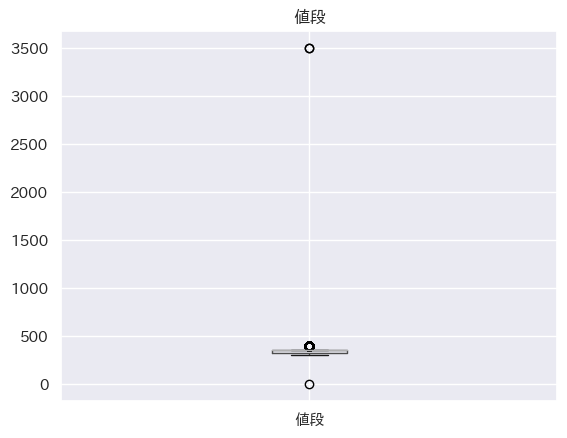

In [ ]:
df[["値段"]].boxplot()
plt.title("値段")
plt.show()

リスト5-6

In [ ]:
# 欠損値を含んでいる行を削除
df.dropna(inplace=True)

# 外れ値の行を削除
lower_bound = 300
upper_bound = 400
df = df[(df["値段"] >= lower_bound) & (df["値段"] <= upper_bound)]

df.describe()

,曜日,気温,年齢,値段
count,3011.00000,3011.000000,3011.000000,3011.000000
mean,3.32182,25.543208,35.009963,344.666224
std,2.04916,8.311949,15.592290,31.730486
min,0.00000,3.200000,12.000000,300.000000
25%,2.00000,20.100000,22.000000,320.000000
50%,4.00000,27.000000,33.000000,350.000000
75%,5.00000,32.400000,47.000000,350.000000
max,6.00000,37.600000,67.000000,400.000000


リスト5-7

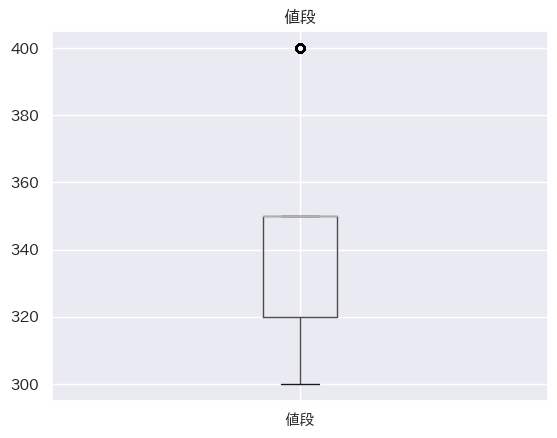

In [ ]:
df[["値段"]].boxplot()
plt.title("値段")
plt.show()

リスト5-8

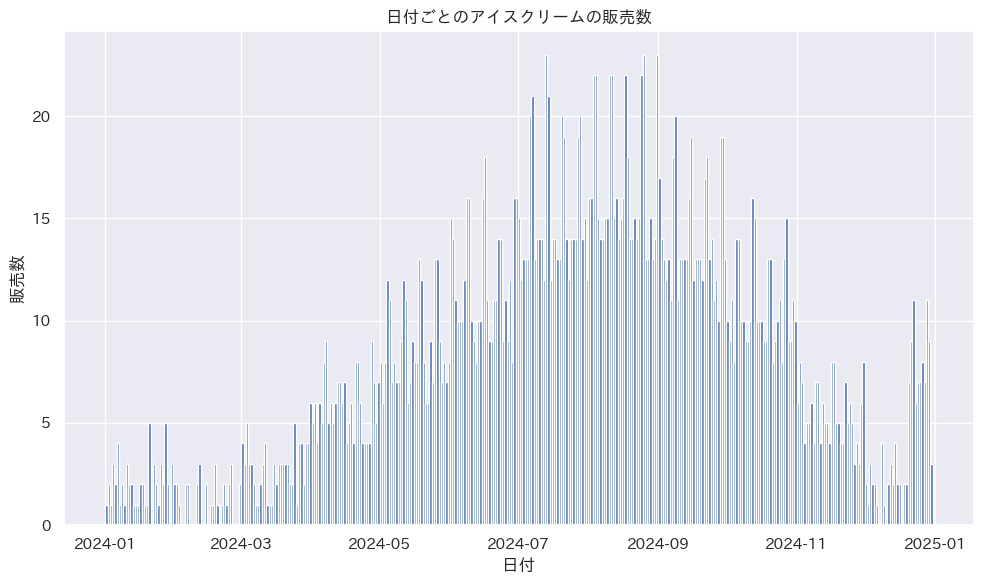

In [ ]:
df["日付"] = pd.to_datetime(df["日付"])

column_name = "日付"

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=365)

plt.xlabel(column_name)
plt.ylabel("販売数")
plt.title(f"{column_name}ごとのアイスクリームの販売数")
plt.tight_layout()
plt.show()

リスト5-9

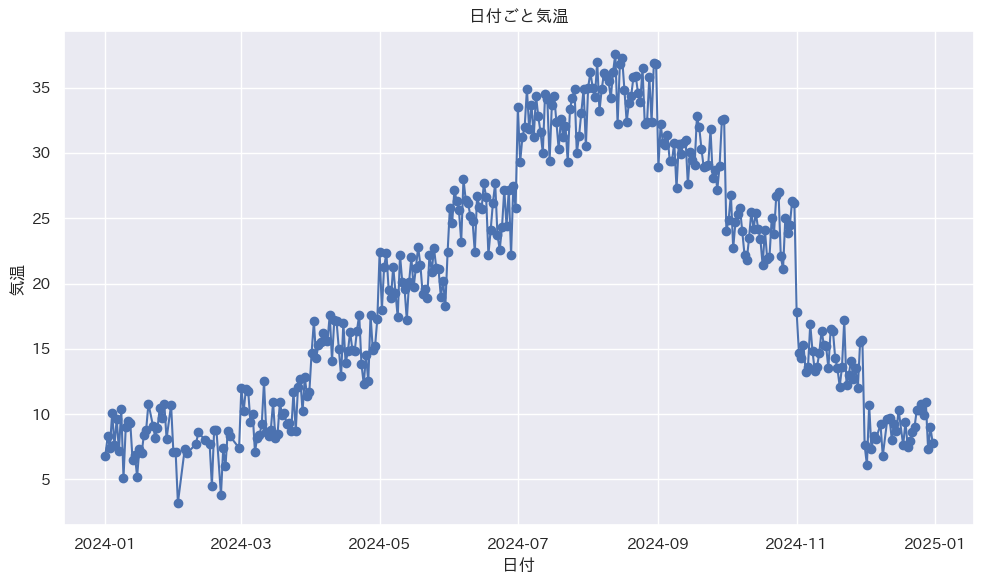

In [ ]:
# 日付ごとに気温の平均を計算
temps = df.groupby('日付')['気温'].mean()

# 日付と気温の折れ線グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(temps.index, temps.values, marker='o')

plt.xlabel("日付")
plt.ylabel("気温")
plt.title("日付ごと気温")
plt.tight_layout()
plt.show()

リスト5-10

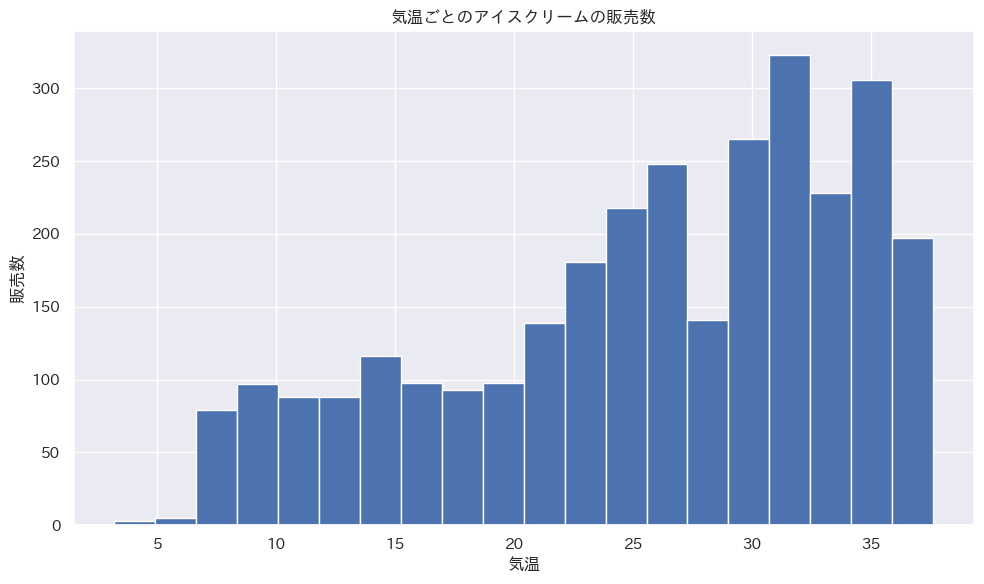

In [ ]:
column_name = "気温"

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=20)

plt.xlabel(column_name)
plt.ylabel("販売数")
plt.title(f"{column_name}ごとのアイスクリームの販売数")
plt.tight_layout()
plt.show()

リスト5-11

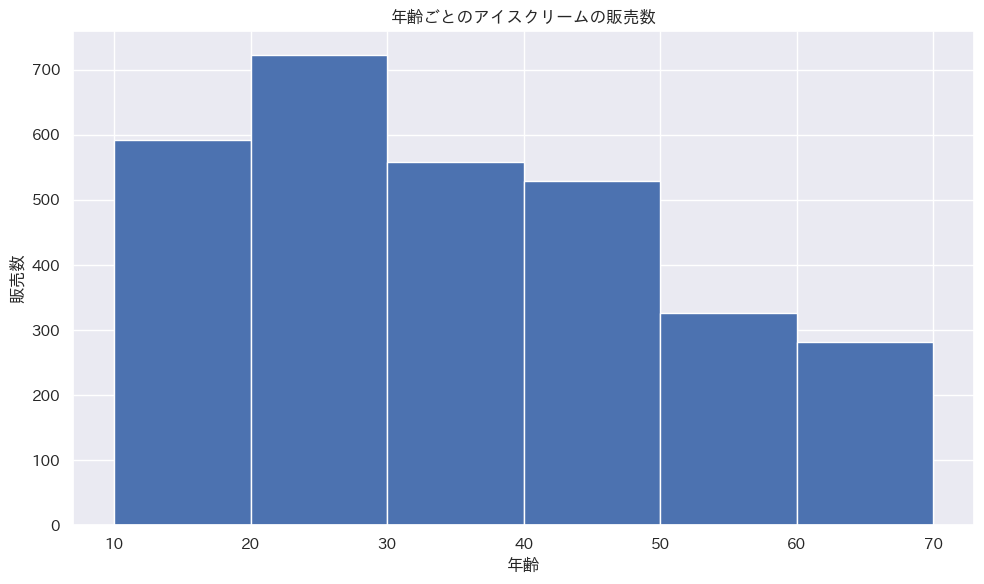

In [ ]:
column_name = "年齢"

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=[10,20,30,40,50,60,70])

plt.xlabel(column_name)
plt.ylabel("販売数")
plt.title(f"{column_name}ごとのアイスクリームの販売数")
plt.tight_layout()
plt.show()

リスト5-12

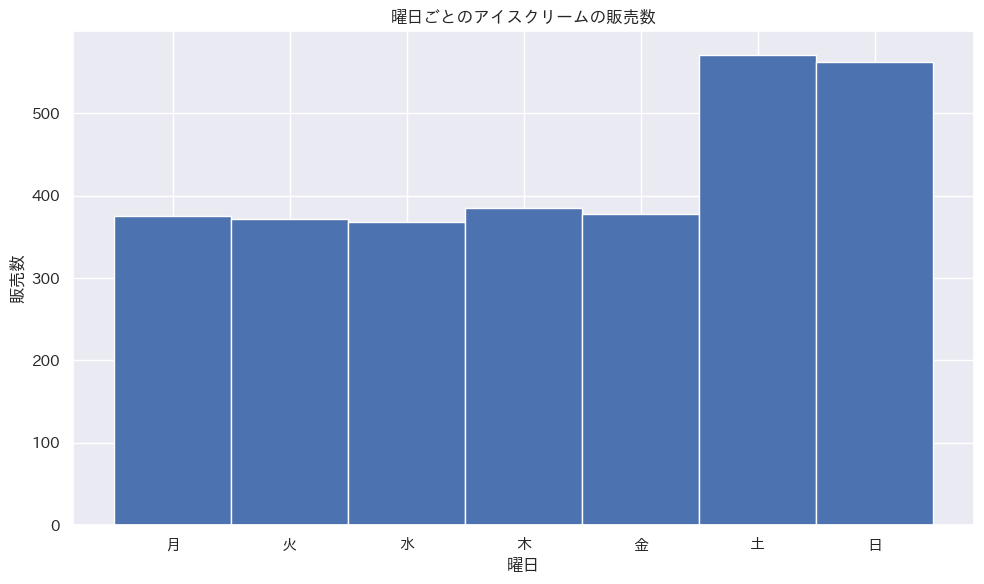

In [ ]:
column_name = "曜日"

# カテゴリーのヒストグラムの作成
plt.figure(figsize=(10, 6))
num_categories = df[column_name].nunique()
bins = np.arange(-0.5, num_categories + 0.5, 1)
plt.hist(df[column_name], bins=bins)

plt.xlabel(column_name)
plt.ylabel("販売数")
plt.title(f"{column_name}ごとのアイスクリームの販売数")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["月", "火", "水", "木", "金", "土", "日"])
plt.tight_layout()
plt.show()

リスト5-13

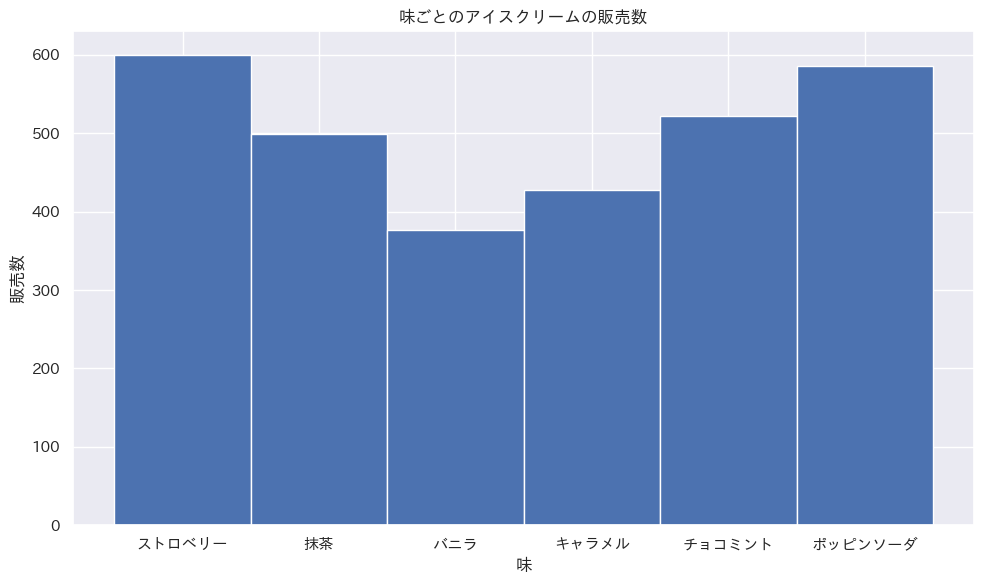

In [ ]:
column_name = "味"

# カテゴリーのヒストグラムの作成
plt.figure(figsize=(10, 6))
num_categories = df[column_name].nunique()
bins = np.arange(-0.5, num_categories + 0.5, 1)
plt.hist(df[column_name], bins=bins)

plt.xlabel(column_name)
plt.ylabel("販売数")
plt.title(f"{column_name}ごとのアイスクリームの販売数")
plt.tight_layout()
plt.show()

リスト5-14

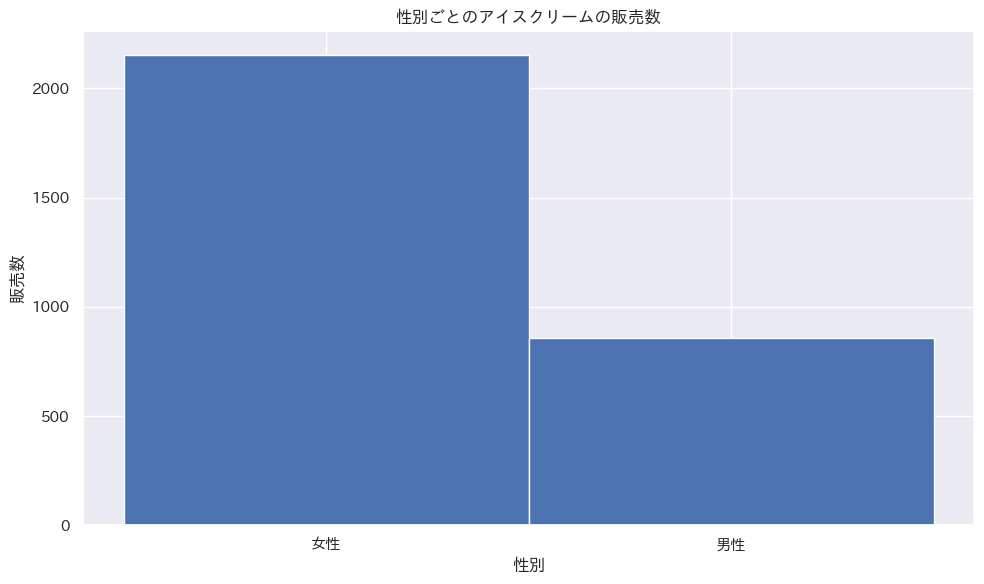

In [ ]:
column_name = "性別"

# カテゴリーのヒストグラムの作成
plt.figure(figsize=(10, 6))
num_categories = df[column_name].nunique()
bins = np.arange(-0.5, num_categories + 0.5, 1)
plt.hist(df[column_name], bins=bins)

plt.xlabel(column_name)
plt.ylabel("販売数")
plt.title(f"{column_name}ごとのアイスクリームの販売数")
plt.tight_layout()
plt.show()



---



リスト5-15

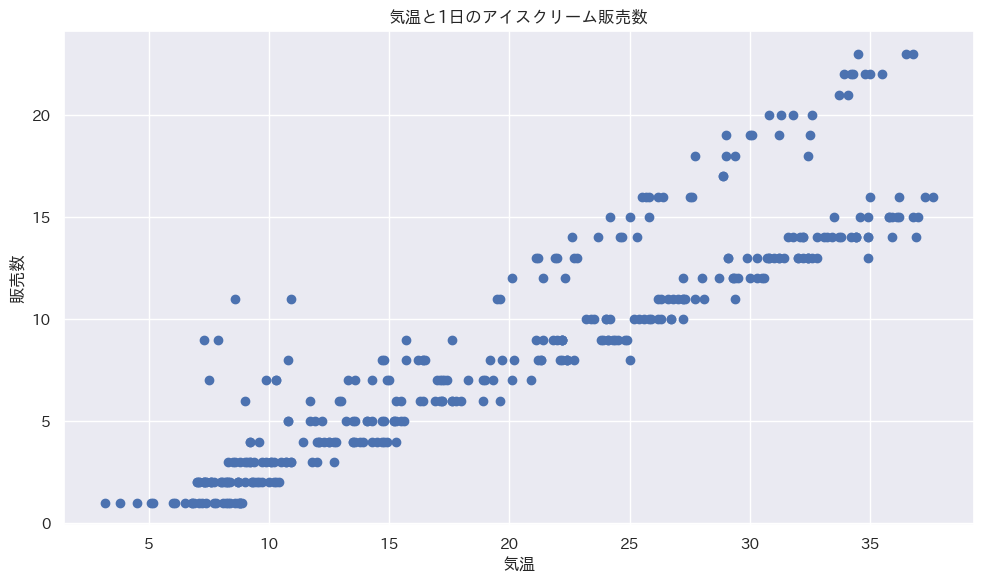

In [ ]:
# 日付ごとの販売数と、その日の平均気温を取得
sales = df.groupby('日付').size()
temps = df.groupby('日付')['気温'].mean()

temp_sales = pd.DataFrame({
    "販売数": sales,
    "気温": temps
})

# 散布図を表示
plt.figure(figsize=(10, 6))
plt.scatter(temps, sales)

plt.xlabel("気温")
plt.ylabel("販売数")
plt.title("気温と1日のアイスクリーム販売数")
plt.tight_layout()
plt.show()

リスト5-16

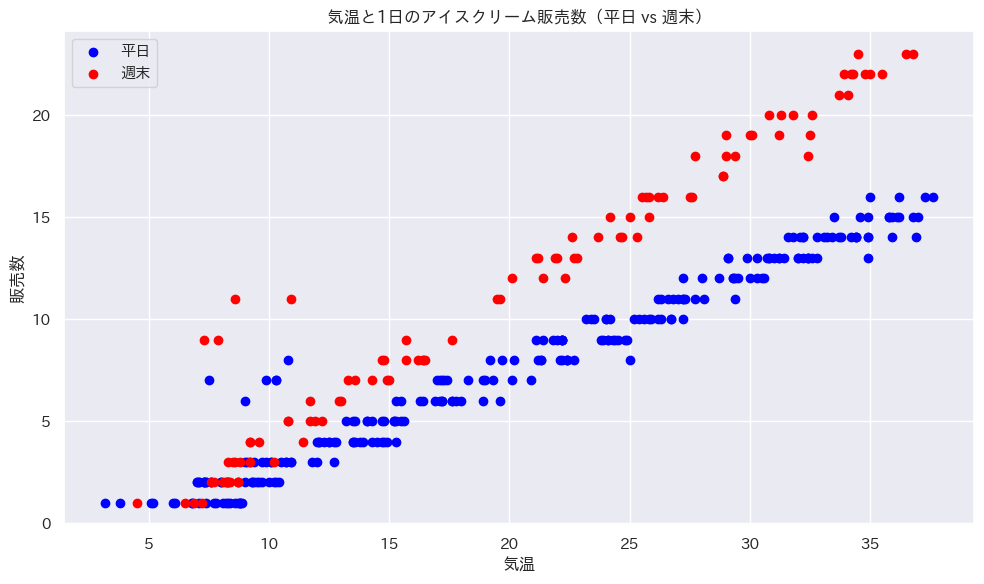

In [ ]:
# データを平日と週末に分ける
df_weekdays = df[df["曜日"].isin([0, 1, 2, 3, 4])]
df_weekends = df[df["曜日"].isin([5, 6])]

# 日付ごとの販売数と、その日の平均気温を取得（平日、週末）
sales0 = df_weekdays.groupby("日付").size()
temps0 = df_weekdays.groupby("日付")["気温"].mean()
sales1 = df_weekends.groupby("日付").size()
temps1 = df_weekends.groupby("日付")["気温"].mean()

# 平日と週末の散布図を表示
plt.figure(figsize=(10, 6))
plt.scatter(temps0, sales0, label="平日", color='blue')
plt.scatter(temps1, sales1, label="週末", color='red')

plt.xlabel("気温")
plt.ylabel("販売数")
plt.title("気温と1日のアイスクリーム販売数（平日 vs 週末）")
plt.legend()
plt.tight_layout()
plt.show()

リスト5-17

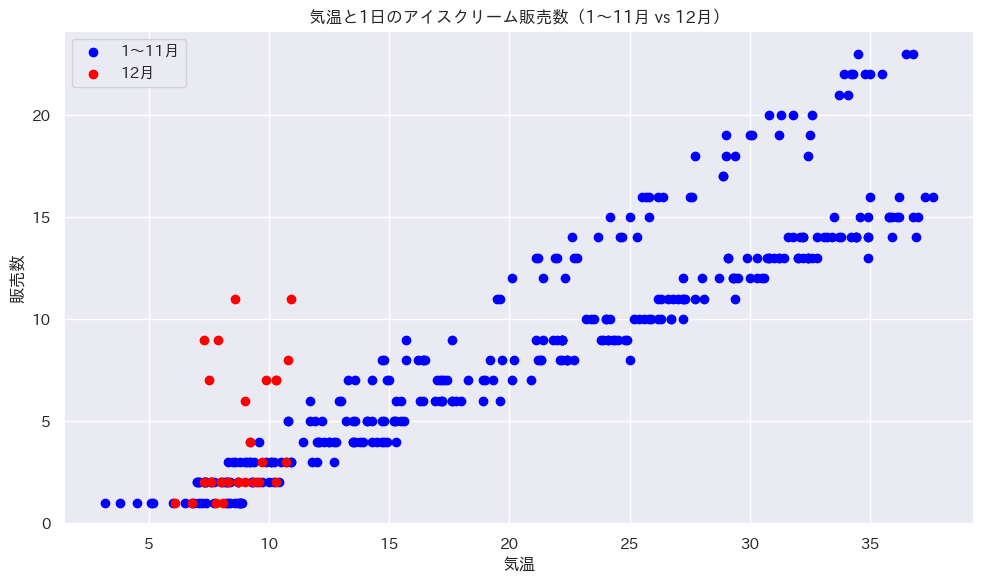

In [ ]:
# データを1〜11月と12月に分ける
df_1_11 = df[df["日付"].dt.month.isin(range(1, 12))]
df_12 = df[df["日付"].dt.month.isin(range(12, 13))]

# 日付ごとに販売数と、その日の平均気温を取得（1-11月、12月）
sales0 = df_1_11.groupby('日付').size()
temps0 = df_1_11.groupby('日付')['気温'].mean()
sales1 = df_12.groupby('日付').size()
temps1 = df_12.groupby('日付')['気温'].mean()

# 散布図を表示
plt.figure(figsize=(10, 6))
plt.scatter(temps0, sales0, label="1〜11月", color='blue')
plt.scatter(temps1, sales1, label="12月", color='red')

plt.xlabel("気温")
plt.ylabel("販売数")
plt.title("気温と1日のアイスクリーム販売数（1〜11月 vs 12月）")
plt.legend()
plt.tight_layout()
plt.show()


リスト5-18

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


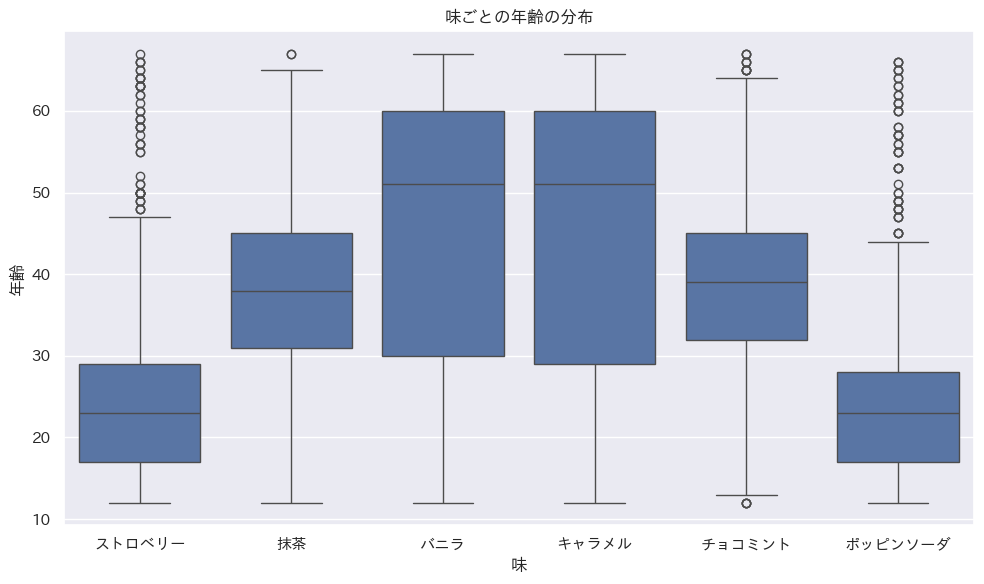

In [ ]:
# 味ごとの年齢の分布を箱ひげ図で表示
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="味", y="年齢")

plt.xlabel("味")
plt.ylabel("年齢")
plt.title("味ごとの年齢の分布")
plt.tight_layout()
plt.show()

リスト5-19

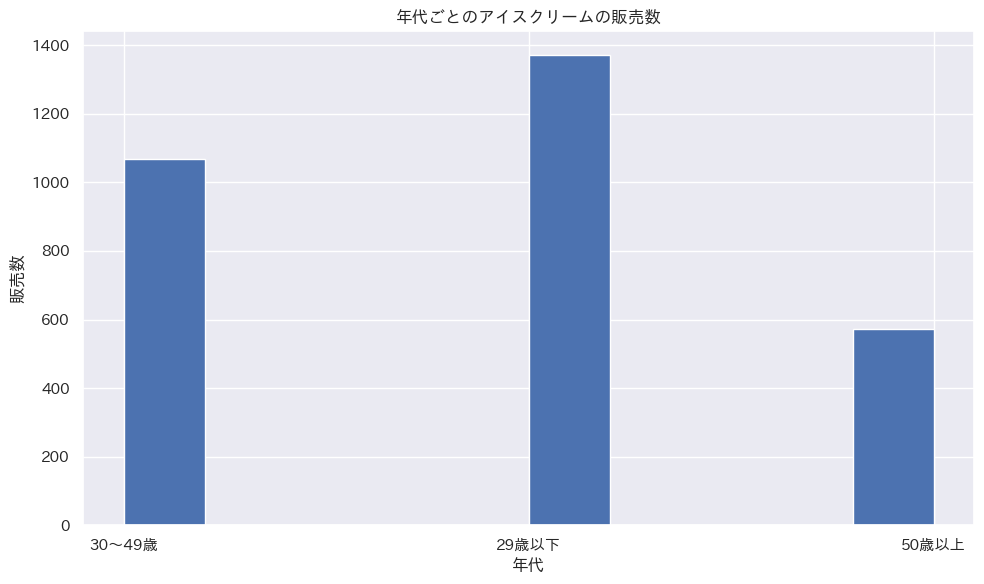

In [ ]:
# 年齢を3つの区分に分ける
age_names = ["29歳以下", "30〜49歳", "50歳以上"]
df["年代"] = pd.cut(df["年齢"], bins=[0, 30, 50, 100], labels=age_names)

# 年代ごとの人数をヒストグラムで表示
plt.figure(figsize=(10, 6))
plt.hist(df["年代"])

plt.xlabel("年代")
plt.ylabel("販売数")
plt.title("年代ごとのアイスクリームの販売数")

plt.tight_layout()
plt.show()

リスト5-20

In [ ]:
cross_tab = pd.crosstab(df["年代"], df["味"])
cross_tab

味,キャラメル,ストロベリー,チョコミント,バニラ,ポッピンソーダ,抹茶
年代,,,,,,
29歳以下,118,474,107,95,477,101
30〜49歳,92,90,376,81,74,355
50歳以上,218,36,39,200,35,43


リスト5-21

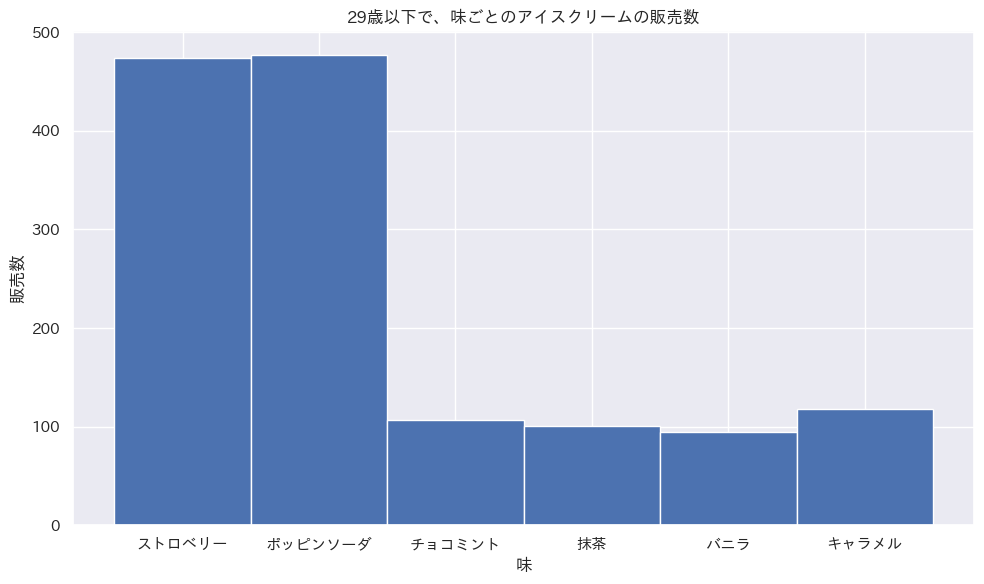

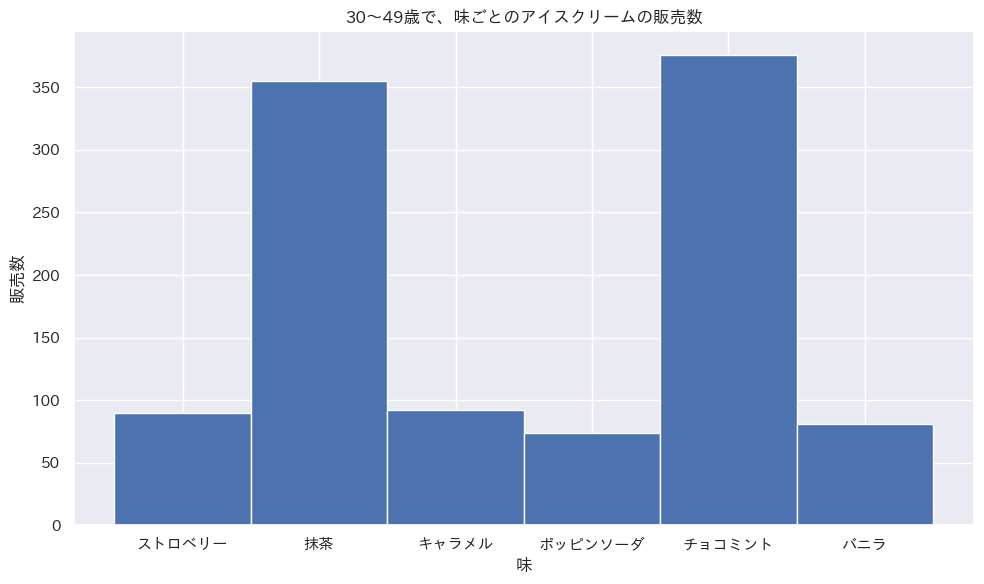

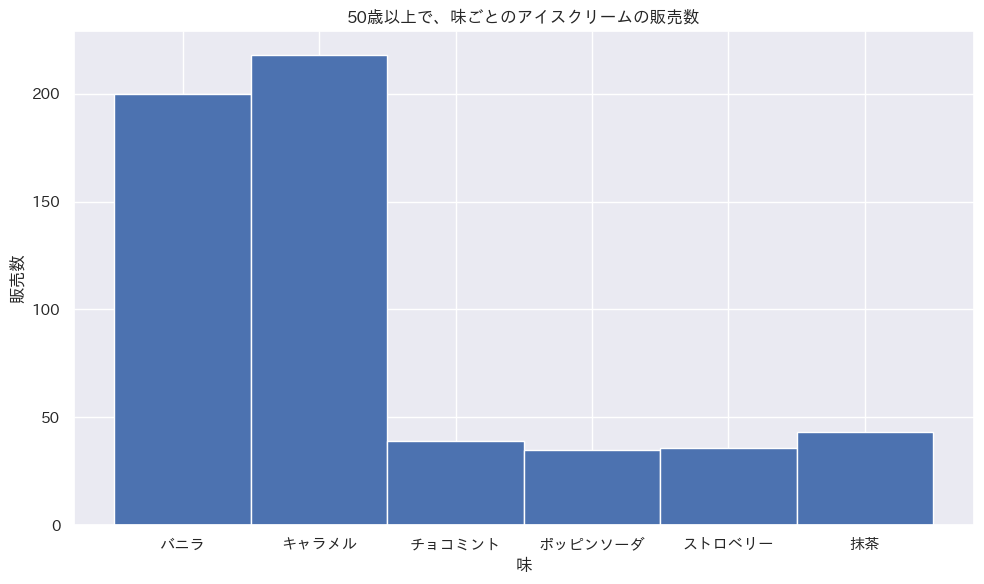

In [ ]:
column_name = "味"

# 年代別に、味ごとの販売数のヒストグラムを作成
for select_group in age_names:
    plt.figure(figsize=(10, 6))
    subset = df[df["年代"] == select_group]
    num_categories = subset[column_name].nunique()
    bins = np.arange(-0.5, num_categories + 0.5, 1)
    plt.hist(subset[column_name], bins=bins)

    plt.xlabel(column_name)
    plt.ylabel("販売数")
    plt.title(f"{select_group}で、{column_name}ごとのアイスクリームの販売数")
    plt.tight_layout()
    plt.show()

## 04 本当にそうだろうか？

### 仮説1：気温が高い日は売り上げが増える。

リスト5-22

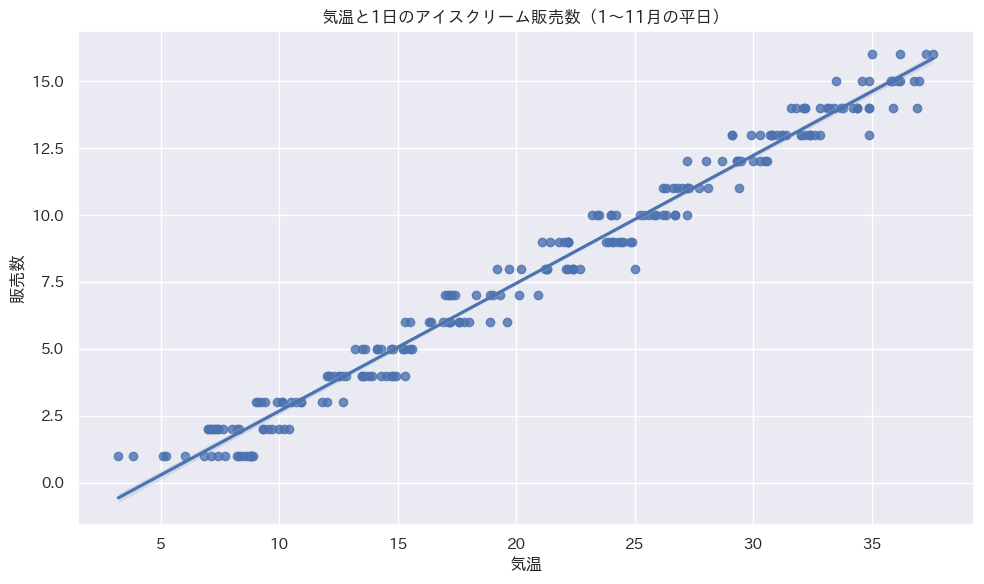

In [ ]:
# データを1〜11月と12月に分ける
df_1_11 = df[df["日付"].dt.month.isin(range(1, 12))]
# データを平日のみにする
df_weekdays = df_1_11[df_1_11["曜日"].isin([0, 1, 2, 3, 4])]

# 日付ごとの販売数と、その日の平均気温を取得（平日）
sales = df_weekdays.groupby("日付").size()
temps = df_weekdays.groupby("日付")["気温"].mean()

temp_sales = pd.DataFrame({
    "販売数": sales,
    "気温": temps
})

# 散布図と回帰直線を描画
plt.figure(figsize=(10, 6))
sns.regplot(x="気温", y="販売数", data=temp_sales)

plt.title("気温と1日のアイスクリーム販売数（1〜11月の平日）")
plt.tight_layout()
plt.show()

リスト5-23

In [ ]:
import statsmodels.api as sm

X = temp_sales["気温"]
y = temp_sales["販売数"]

# 最小二乗法でモデルを作る
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 結果を取得
p_value = model.pvalues["気温"]
coef = model.params["気温"]

# 結果の表示
print(f"p値：{p_value:.4f}")
print(f"傾き：{coef:.4f}")

# 結果の解釈
alpha = 0.05
if p_value < alpha:
    print("有意差あり：気温が販売数に与える影響は、統計的に有意です。")
    if coef > 0:
        print("気温が高いほど、販売数が増加する傾向があります。")
    else:
        print("気温が高いほど、販売数が減少する傾向があります。")
else:
    print("有意差なし：気温が販売数に与える影響は、統計的に有意ではありません。")

p値：0.0000
傾き：0.4772
有意差あり：気温が販売数に与える影響は、統計的に有意です。
気温が高いほど、販売数が増加する傾向があります。


リスト5-24

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 既存のデータを使用（temp_sales はすでに作成済み）
X = temp_sales[["気温"]]
y = temp_sales["販売数"]

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの作成と訓練
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# モデルの評価
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 評価結果の表示
print("モデルの評価結果:")
print(f"このモデルの決定係数（R²）は、{r2:.2f}なので、")
if r2 > 0.8:
    print("かなり良い当てはまりです。")
elif r2 > 0.6:
    print("まあまあの当てはまりです。")
else:
    print("あまり良い当てはまりとは言えません。")
print(f"平均二乗誤差（MSE）: {mse:.2f}")
print(f"決定係数（R-squared）: {r2:.2f}")


モデルの評価結果:
このモデルの決定係数（R²）は、0.99なので、
かなり良い当てはまりです。
平均二乗誤差（MSE）: 0.30
決定係数（R-squared）: 0.99


リスト5-25

In [ ]:
new_temp = 25 # 明日の気温（仮の値）
new_data = pd.DataFrame({"気温":[new_temp] })
pre_sales = model.predict(new_data)[0]
print(f"気温が{new_temp}度の場合、予測される販売数は約{pre_sales:.0f}個です。")

気温が25度の場合、予測される販売数は約10個です。


### 仮説2：週末は平日より売り上げが増える。

リスト5-26

In [ ]:
from scipy import stats

# 1.平日と週末にデータを分ける
df_weekdays = df[df["曜日"].isin([0, 1, 2, 3, 4])]
df_weekends = df[df["曜日"].isin([5, 6])]

# 2.各グループ（平日、週末）の販売数を集計する
sales_weekdays = df_weekdays.groupby("日付").size()
sales_weekends = df_weekends.groupby("日付").size()

print("平日販売数:",sales_weekdays.sum())
print("週末販売数:",sales_weekends.sum())

# 3.平日と週末の販売数の平均を比較するためのt検定を行う
t_stat, p_value = stats.ttest_ind(sales_weekends, sales_weekdays)

# p値の表示
print(f"\nt検定量：{t_stat}")
print(f"p値：{p_value:.4f}")

# 検定結果の解釈
alpha = 0.05
if p_value < alpha:
    print("有意差あり：週末の平均販売数は、平日と週末で有意な差があります。")
else:
    print("有意差なし：週末の平均販売数は、平日と週末で有意な差はありません。")

平日販売数: 1878
週末販売数: 1133

t検定量：6.027865743862192
p値：0.0000
有意差あり：週末の平均販売数は、平日と週末で有意な差があります。


### 仮説3：年代別（25歳以下、25〜50歳、50歳以上）で、好まれる味が違う。


リスト5-27

In [ ]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df["年代"], df["味"])
print(cross_tab)

# カイ二乗検定の実施
chi2, p_value, dof, ex = chi2_contingency(cross_tab)

# 結果の表示
print(f"\nカイ二乗統計量：{chi2}")
print(f"p値：{p_value:.4f}")

# 結果の解釈
alpha = 0.05
if p_value < alpha:
    print("有意差あり：年代と味に、有意な関係があります。")
else:
    print("有意差なし：年代と味に、有意な関係はありません。")

味       キャラメル  ストロベリー  チョコミント  バニラ  ポッピンソーダ   抹茶
年代                                              
29歳以下     118     474     107   95      477  101
30〜49歳     92      90     376   81       74  355
50歳以上     218      36      39  200       35   43

カイ二乗統計量：1728.7364009853063
p値：0.0000
有意差あり：年代と味に、有意な関係があります。


リスト5-28

In [ ]:
cross_tab = pd.crosstab(df["気温"], df["味"])

# カイ二乗検定の実施
chi2, p_value, dof, ex = chi2_contingency(cross_tab)

# 結果の表示
print(f"カイ二乗統計量：{chi2}")
print(f"p値：{p_value:.4f}")

# 結果の解釈
alpha = 0.05
if p_value < alpha:
    print("有意差あり：気温と味に、有意な関係があります。")
else:
    print("有意差なし：気温と味に、有意な関係はありません。")

カイ二乗統計量：1094.2942288247832
p値：0.1666
有意差なし：気温と味に、有意な関係はありません。


### 仮説4：気温が低くても、クリスマスの時期は売り上げが増える。



リスト5-29

In [ ]:
# 1.1月と12月にデータを分ける
df_01 = df[df["日付"].dt.month == 1]
df_12 = df[df["日付"].dt.month == 12]

# 2.各グループ（1月、12月）の販売数を集計する
sales_01 = df_01.groupby('日付').size()
sales_12 = df_12.groupby('日付').size()

# 3.1月と12月の販売数の平均を比較するためのt検定を行う
t_stat, p_value = stats.ttest_ind(sales_12, sales_01)

# 結果を表示
print(f"t統計量: {t_stat}")
print(f"p値: {p_value:.4f}")

# p値に基づく結果の解釈
if p_value < 0.05:
    print("有意差あり: 1月と12月の間で販売数に、有意な差があります。")
else:
    print("有意差なし: 1月と12月の間で販売数に、有意な差はありません。")


t統計量: 3.4340663170278924
p値: 0.0011
有意差あり: 1月と12月の間で販売数に、有意な差があります。
